In [51]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib import colors
import scipy.stats as sts

import warnings
warnings.filterwarnings('ignore')

In [52]:
from_file = 'data/full_vis.csv'

data = pd.read_csv(from_file, sep=';')

In [53]:
data.head().T

,0,1,2,3,4
Название,BMW X1,Citroen Xantia,Mercedes-Benz E-Класс,Peugeot 605,Volkswagen Passat
Цена,48019,4950,20297,1485,9777
Регион,Минск,Гомельская обл.,Гродненская обл.,Минск,Гомельская обл.
Год,2016,1998,2003,1996,2000
Состояние,с пробегом,с пробегом,с пробегом,с пробегом,с пробегом
Пробег,181000,363400,307000,107000,252475
Тип топлива,дизель,дизель,дизель,дизель,дизель
Объем,2000,2100,2200,2100,1900
Цвет,другой,другой,черный,зеленый,черный
Тип кузова,внедорожник 5 дв,хэтчбек 5 дв,седан,седан,универсал


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68318 entries, 0 to 68317
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Название                                             68318 non-null  object
 1   Цена                                                 68318 non-null  int64 
 2   Регион                                               68318 non-null  object
 3   Год                                                  68318 non-null  int64 
 4   Состояние                                            68318 non-null  object
 5   Пробег                                               68318 non-null  int64 
 6   Тип топлива                                          68318 non-null  object
 7   Объем                                                68318 non-null  int64 
 8   Цвет                                                 68318 non-null  object


In [55]:
def draw(data, queries, column, labels):
    """
    This function is for saving dataframe to
    to csv-file.
    :return: nothing

    """
    first_series = np.log(data.query(queries[0])[column])
    second_series = np.log(data.query(queries[1])[column])
    
    plt.figure(figsize=(16, 10))
    sns.kdeplot(first_series, shade=True, color='b', label=labels[0])
    sns.kdeplot(second_series, shade=True, color='g', label=labels[1])
    plt.show()
    print()

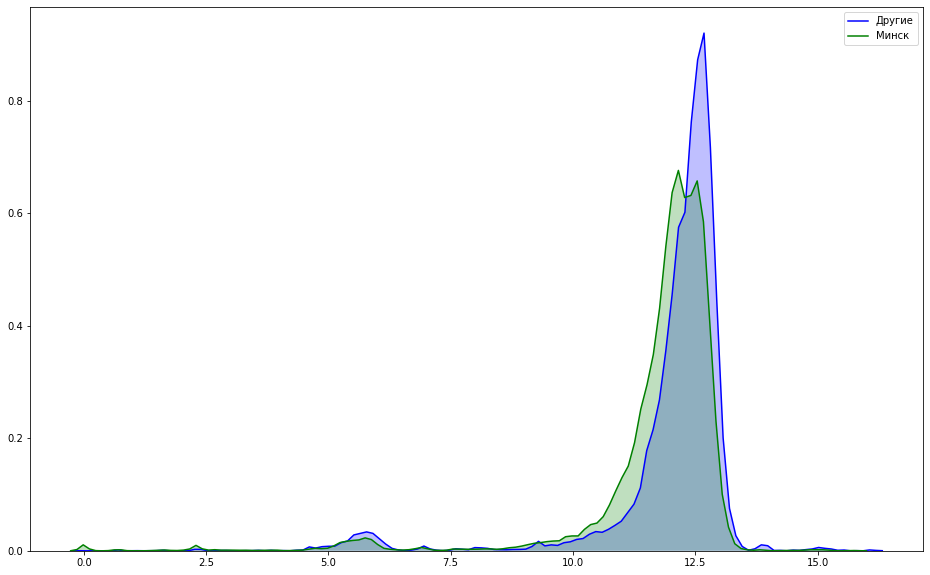

In [56]:
query = ["Регион!='Минск'", "Регион=='Минск'"]
draw(data, query, 'Пробег', ['Другие', 'Минск'])

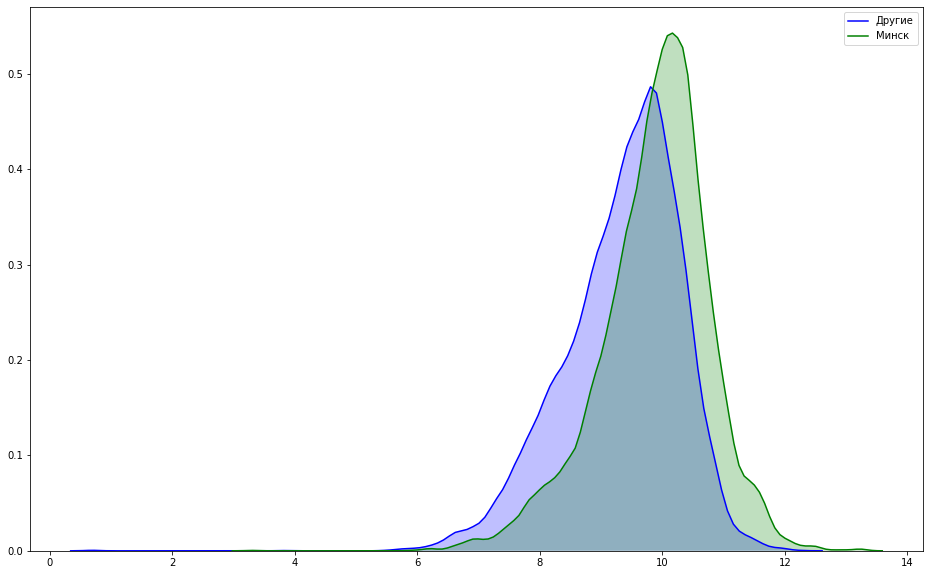

In [57]:
query = ["Регион!='Минск'", "Регион=='Минск'"]
draw(data, query, 'Цена', ['Другие', 'Минск'])

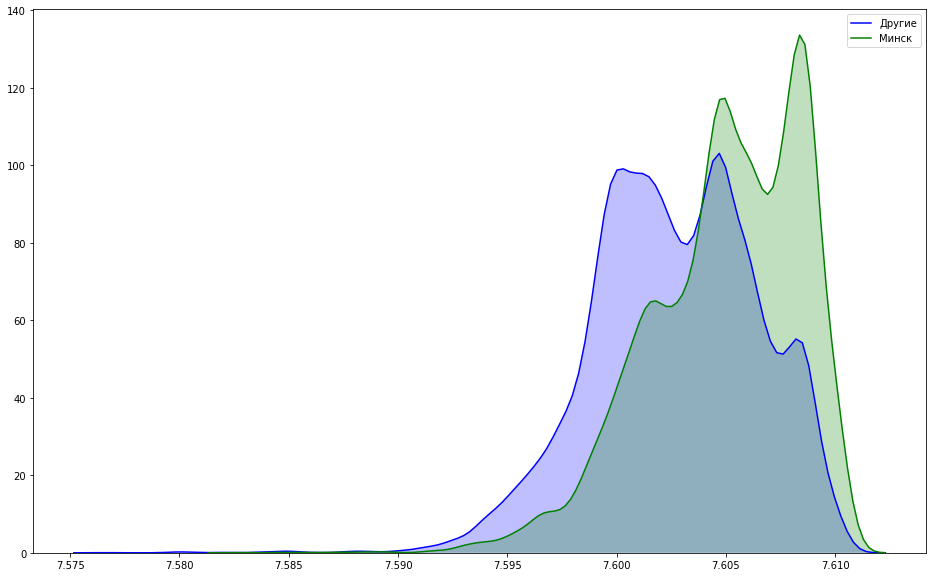

In [58]:
query = ["Регион!='Минск'", "Регион=='Минск'"]
draw(data, query, 'Год', ['Другие', 'Минск'])